# House price predictor (regression problem)

## Exloratory data analysis

1. Check the missing data (df.isnull().sum())
2. Get a data overview with df.describe().transpose()
3. Look at the distribution of some interesting features sns.distplot(df['price'])
4. Explore the correlation of the features: sns.corr(df['price']).sort_values()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("../DATA/kc_house_data.csv")

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [12]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


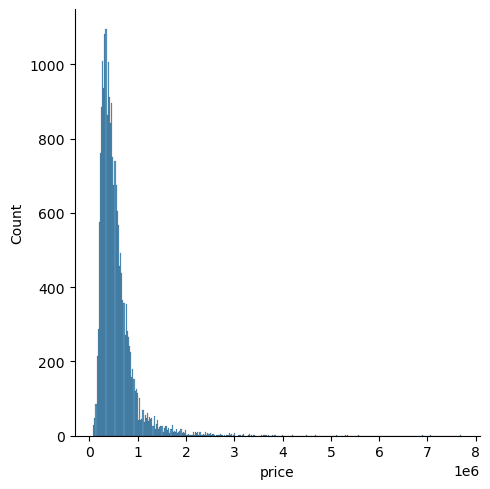

In [19]:
sns.displot(df['price'])

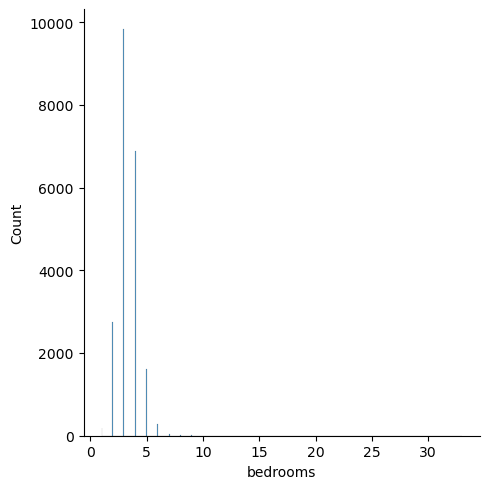

In [28]:
sns.displot(df['bedrooms'])

In [215]:
df.corr()['price'].sort_values()

day             -0.014684
month           -0.009928
year             0.003727
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

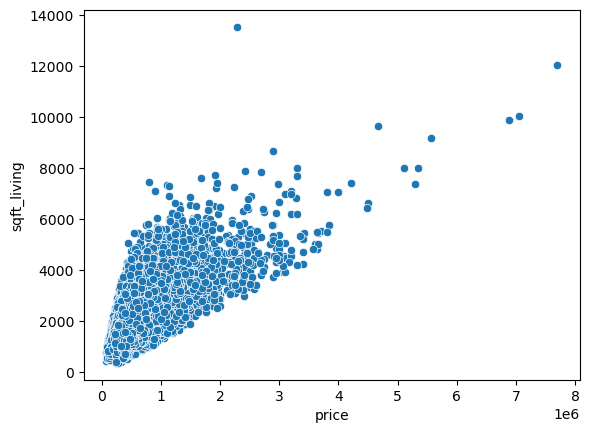

In [31]:
sns.scatterplot(x = 'price',y = 'sqft_living',data = df)

<Axes: xlabel='bedrooms', ylabel='price'>

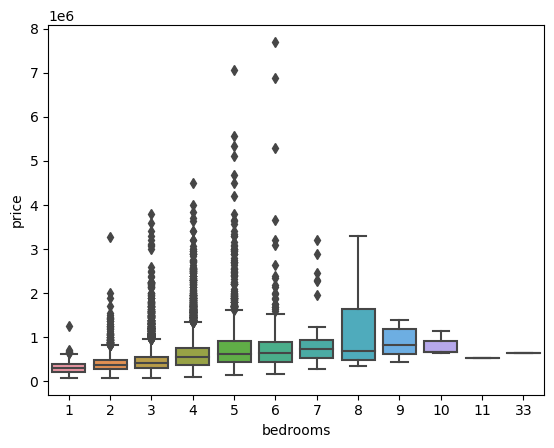

In [32]:
sns.boxplot(x = 'bedrooms',y = 'price',data = df)

<Axes: xlabel='long', ylabel='lat'>

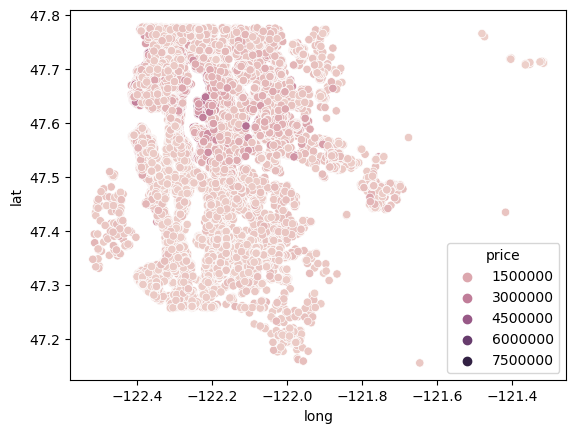

In [37]:
sns.scatterplot(x = 'long', y = 'lat',data = df,hue = 'price',marker)

In [38]:
## Drop the outliers

In [41]:
df.sort_values('price',ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [42]:
len(df)

21597

In [43]:
len(df)*0.01

215.97

In [45]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<Axes: xlabel='long', ylabel='lat'>

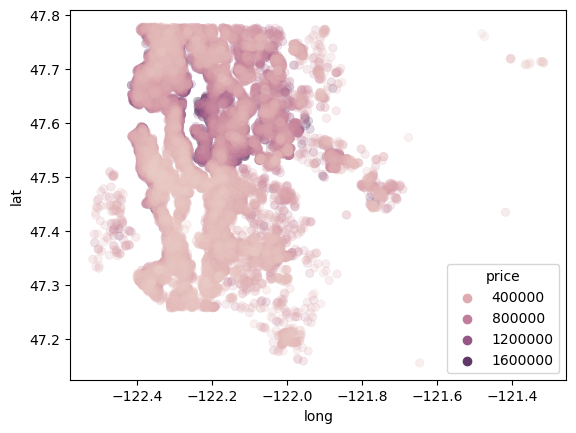

In [47]:
sns.scatterplot(x = 'long', y = 'lat',data = non_top_1_perc,hue = 'price',edgecolor= None, alpha = 0.2)

In [48]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now, lets drop the id column since we dont need it

In [49]:
df = df.drop('id',axis = 1)

In [56]:
df['date'] = pd.to_datetime(df['date'])

In [60]:
df['year'] = df['date'].apply(lambda x: x.year)

In [61]:
df['month'] = df['date'].apply(lambda x: x.month)

In [62]:
df['day'] = df['date'].apply(lambda x: x.day)

In [65]:
df = df.drop('date',axis = 1)

<Axes: xlabel='month', ylabel='price'>

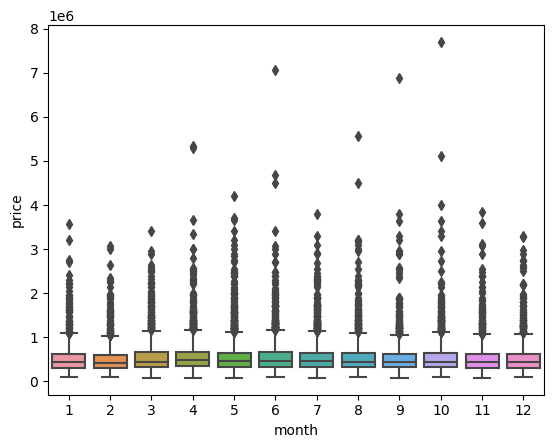

In [77]:
sns.boxplot(x = 'month',y = 'price',data = df)

<Axes: xlabel='month'>

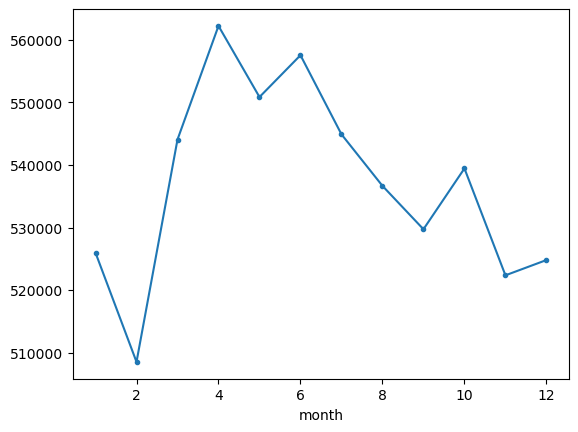

In [81]:
df.groupby('month').mean()['price'].plot(marker = '.')

In [82]:
df = df.drop('zipcode',axis = 1)

In [83]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,47.6993,-122.346,1530,1509,2014,5,21
21593,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,47.5107,-122.362,1830,7200,2015,2,23
21594,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,47.5944,-122.299,1020,2007,2014,6,23
21595,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,0,2004,0,47.5345,-122.069,1410,1287,2015,1,16


## Train test data split

In [91]:
y = df['price']

In [151]:
X = df.drop('price', axis = 1).values

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [154]:
y_train.shape

(14469,)

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler = MinMaxScaler()

In [157]:
scaler.fit(X_train)

MinMaxScaler()

In [161]:
X_train

array([[4.00000000e-01, 4.33333333e-01, 2.24753227e-01, ...,
        0.00000000e+00, 8.18181818e-01, 9.33333333e-01],
       [2.00000000e-01, 2.00000000e-01, 9.93166287e-02, ...,
        1.00000000e+00, 3.63636364e-01, 1.33333333e-01],
       [3.00000000e-01, 6.66666667e-02, 8.95975702e-02, ...,
        0.00000000e+00, 8.18181818e-01, 8.66666667e-01],
       ...,
       [3.00000000e-01, 1.33333333e-01, 8.80789674e-02, ...,
        0.00000000e+00, 5.45454545e-01, 6.66666667e-01],
       [0.00000000e+00, 3.33333333e-02, 7.59301443e-04, ...,
        0.00000000e+00, 4.54545455e-01, 6.33333333e-01],
       [3.00000000e-01, 2.66666667e-01, 1.81093394e-01, ...,
        1.00000000e+00, 1.81818182e-01, 8.00000000e-01]])

In [159]:
X_train = scaler.transform(X_train)

In [160]:
X_test = scaler.transform(X_test)

## Building the model

In [114]:
import tensorflow as tf

In [118]:
print(tf.__version__)

2.13.0


In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [164]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [163]:
model = Sequential()
model.add(Dense(10,'relu'))
model.add(Dense(10,'relu'))
model.add(Dense(10,'relu'))
model.add(Dense(10,'relu'))
model.add(Dense(10,'relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss = 'mse')

In [172]:
model.fit(x = X_train,y = y_train,validation_data = (X_test,y_test),batch_size = 128,epochs=400)

Epoch 1/400
114/114 [==============================] - 1s 6ms/step - loss: 30152093696.0000 - val_loss: 31445561344.0000
Epoch 2/400
114/114 [==============================] - 1s 6ms/step - loss: 30170970112.0000 - val_loss: 31545989120.0000
Epoch 3/400
114/114 [==============================] - 1s 6ms/step - loss: 30166693888.0000 - val_loss: 31416297472.0000
Epoch 4/400
114/114 [==============================] - 1s 6ms/step - loss: 30149103616.0000 - val_loss: 31426861056.0000
Epoch 5/400
114/114 [==============================] - 1s 6ms/step - loss: 30105073664.0000 - val_loss: 31383488512.0000
Epoch 6/400
114/114 [==============================] - 1s 6ms/step - loss: 30120613888.0000 - val_loss: 31391481856.0000
Epoch 7/400
114/114 [==============================] - 1s 6ms/step - loss: 30106667008.0000 - val_loss: 31509866496.0000
Epoch 8/400
114/114 [==============================] - 1s 6ms/step - loss: 30078588928.0000 - val_loss: 31362453504.0000
Epoch 9/400
114/114 [===========

<Axes: >

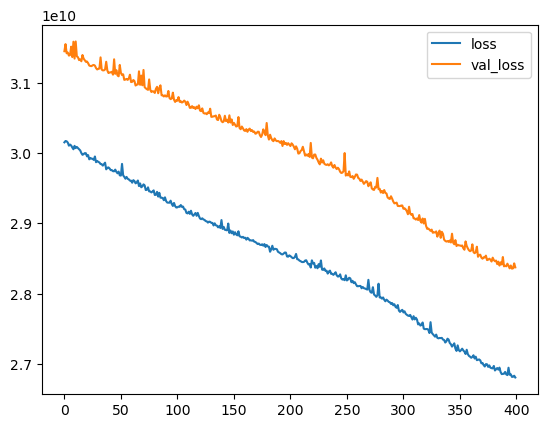

In [174]:
pd.DataFrame(model.history.history).plot()

# Model evaluation 

In [183]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [176]:
predictions = model.predict(X_test)

223/223 [==============================] - 0s 2ms/step


In [178]:
np.sqrt(mean_squared_error(predictions,y_test))

168455.2723220756

In [179]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

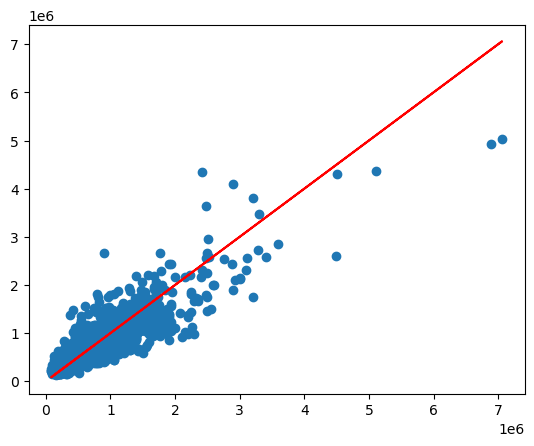

In [186]:
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test,'r')

In [206]:
single_house = df.drop('price',axis = 1).iloc[0]

In [207]:
single_house = single_house.values.reshape(-1,20)

In [208]:
single_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01,  1.30000e+01]])

In [209]:
single_house = scaler.transform(single_house)

In [211]:
model.predict(single_house)

1/1 [==============================] - 1s 537ms/step


array([[273120.38]], dtype=float32)

In [212]:
nums = [1,2,3,4,5,6]
[num**2 if num%2 ==0 else 'odd' for num in nums]

['odd', 4, 'odd', 16, 'odd', 36]